### Assessed Task #2

In [1]:
import tweepy
import pandas as pd
import numpy as np
import json
import re
import matplotlib.pyplot as plt

#from collections import Counter

import warnings
warnings.filterwarnings('ignore')

**Task1**: Authentication

In [2]:
# Your credentials go here ...

consumer_key = 'TsBOnrwydStaWmvUeShzJ90iS'
consumer_key_secret = 'FkkmXlmwTSjaf8pds7rz3tvOpehRVPpB8lKlWBQzBp4fsDbKY1'
access_token = '2576751307-N7lUuCWkpY7ZcNDJZlRzDB6QAnfEjN9tgWhhA9B'
access_token_secret = 'L6nOSOKuJ2GbSDj8nTfGb5yCQVxGKlZrIFzzdtyacwfkV'

auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)

auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

**Task 1**
Collect 400 tweets from two different Twitter users (Australian politicians), 200 from each.  You should try to find two politicians where you would expect there to be some noticeable differences in their tweets.


#### Julian Hill MP (@JulianHillMP) 


In [3]:
max_tweets = 200
screen_name = '@JulianHillMP'

tweets_JH = api.user_timeline(screen_name = screen_name,
                             tweet_mode = 'extended',
                             count = max_tweets)

In [4]:
list_of_dicts_JH = []
for tweet in tweets_JH:
    list_of_dicts_JH.append(tweet._json)
#print(list_of_dicts_JH)

with open('Files/JulianHillMP_tweet.json', mode = 'w') as file:
    file.write(json.dumps(list_of_dicts_JH , indent = 4))

#### Scott Morrison (@ScottMorrisonMP) 

In [5]:
max_tweets = 200
screen_name = '@ScottMorrisonMP'

tweets_SM = api.user_timeline(screen_name = screen_name,
                           tweet_mode = 'extended',
                           count = max_tweets)

In [6]:
list_of_dicts_SM = []
for tweet in tweets_SM:
    list_of_dicts_SM.append(tweet._json)
#print(list_of_dicts_SM)

with open('Files/ScottMorrisonMP_tweet.json', mode = 'w') as file:
    file.write(json.dumps(list_of_dicts_SM , indent = 4))

In [7]:
#print(list_of_dicts_JH)

In [8]:
#JulianHillMP
list1 = []
with open('Files/JulianHillMP_tweet.json', encoding = 'utf-8', mode = 'r') as file:
        list_of_dicts_JH = json.load(file)
        for dict in list_of_dicts_JH:
             list1.append({'user':str(dict['user']['name']),
                          'full_text':str(dict['full_text']),
                          'posting_time':dict['created_at'],
             })
#print(list[0])

In [9]:
#JulianHillMP
df_JH = pd.DataFrame(list1 , columns = ['user','full_text', 'posting_time'])
df_JH

,user,full_text,posting_time
0,Julian Hill MP,"Ummm….Matty dear, just reminding you, that you...",Thu Oct 14 05:39:08 +0000 2021
1,Julian Hill MP,🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦...,Thu Oct 14 05:37:02 +0000 2021
2,Julian Hill MP,RT @MurdochCadell: Thank you Julian Hill MP.\n...,Wed Oct 13 22:14:01 +0000 2021
3,Julian Hill MP,"Last time this happened, Liberal Senator Amand...",Wed Oct 13 22:13:54 +0000 2021
4,Julian Hill MP,This stinks. Lobbyists should not be members o...,Wed Oct 13 22:13:49 +0000 2021
...,...,...,...
194,Julian Hill MP,RT @LukeGoslingMP: PM closed the 🇦🇺 embassy in...,Wed Aug 25 09:21:33 +0000 2021
195,Julian Hill MP,Morrison says “I wish it were different”\n\nPe...,Wed Aug 25 03:05:52 +0000 2021
196,Julian Hill MP,Morrison has run a blatantly discriminatory vi...,Wed Aug 25 03:00:33 +0000 2021
197,Julian Hill MP,"Strong words, but I stand by them. \n\nThis is...",Wed Aug 25 02:56:09 +0000 2021


In [10]:
df_JH['posting_time'] = pd.to_datetime(df_JH['posting_time'])
df_JH['hour'] = df_JH['posting_time'].dt.hour

__ScottMorrisonMP__

In [11]:
#print(list_of_dicts_SM)

In [12]:
#ScottMorrisonMP
list2 = []
with open('Files/ScottMorrisonMP_tweet.json', encoding = 'utf-8', mode = 'r') as file:
        list_of_dicts_SM = json.load(file)
        for dict in list_of_dicts_SM:
            list2.append({'user':str(dict['user']['name']),
                          'full_text':str(dict['full_text']),
                          'posting_time':dict['created_at'],
             })

In [13]:
#ScottMorrisonMP
df_SM = pd.DataFrame(list2 , columns = ['user','full_text', 'posting_time'])
df_SM

,user,full_text,posting_time
0,Scott Morrison,Warm congrats Japanese PM Kishida. Great to ch...,Tue Oct 05 05:11:00 +0000 2021
1,Scott Morrison,Australia and India are great friends. Our Com...,Thu Sep 30 07:18:22 +0000 2021
2,Scott Morrison,Great to meet with Australian Indian media tod...,Thu Sep 30 07:18:21 +0000 2021
3,Scott Morrison,Great to meet my good friend Japanese PM @suga...,Sat Sep 25 10:00:31 +0000 2021
4,Scott Morrison,Excellent discussions at our first in-person Q...,Fri Sep 24 22:58:33 +0000 2021
...,...,...,...
195,Scott Morrison,Thank you once again to the people of Victoria...,Wed Feb 03 22:13:53 +0000 2021
196,Scott Morrison,Had a warm discussion with Chancellor Merkel l...,Mon Feb 01 21:10:35 +0000 2021
197,Scott Morrison,The coming days will be difficult for many Wes...,Sun Jan 31 05:52:40 +0000 2021
198,Scott Morrison,Delighted to meet virtually with Malaysian PM ...,Wed Jan 27 10:09:34 +0000 2021


In [14]:
df_SM['posting_time'] = pd.to_datetime(df_SM['posting_time'])
df_SM['hour'] = df_SM['posting_time'].dt.hour

**Merging df_JH and df_SM tables into one df**

In [15]:
df = pd.concat([df_JH,df_SM], axis=0).reset_index()
df

,index,user,full_text,posting_time,hour
0,0,Julian Hill MP,"Ummm….Matty dear, just reminding you, that you...",2021-10-14 05:39:08+00:00,5
1,1,Julian Hill MP,🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦...,2021-10-14 05:37:02+00:00,5
2,2,Julian Hill MP,RT @MurdochCadell: Thank you Julian Hill MP.\n...,2021-10-13 22:14:01+00:00,22
3,3,Julian Hill MP,"Last time this happened, Liberal Senator Amand...",2021-10-13 22:13:54+00:00,22
4,4,Julian Hill MP,This stinks. Lobbyists should not be members o...,2021-10-13 22:13:49+00:00,22
...,...,...,...,...,...
394,195,Scott Morrison,Thank you once again to the people of Victoria...,2021-02-03 22:13:53+00:00,22
395,196,Scott Morrison,Had a warm discussion with Chancellor Merkel l...,2021-02-01 21:10:35+00:00,21
396,197,Scott Morrison,The coming days will be difficult for many Wes...,2021-01-31 05:52:40+00:00,5
397,198,Scott Morrison,Delighted to meet virtually with Malaysian PM ...,2021-01-27 10:09:34+00:00,10


**Task 2** Use pandas to plot the posting times of the tweets for the two users in one bar chart; the aim of the plot is to distinguish the two users.

Text(0.5, 0, 'Time')

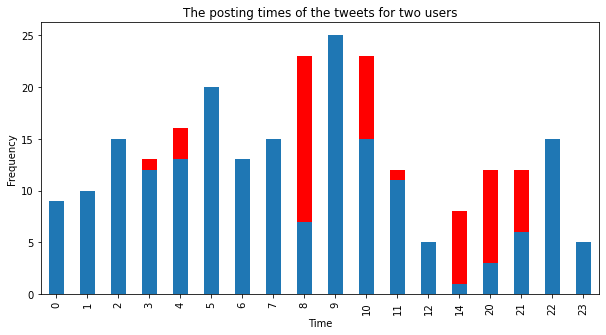

In [16]:
ax1 = df_JH['hour'].value_counts().sort_index().plot.bar(figsize = (10, 5), color = 'red')
ax2 = df_SM['hour'].value_counts().sort_index().plot.bar(figsize = (10, 5))
ax1.set_title('The posting times of the tweets for two users')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Time')

**Task 3** Use pandas to construct one bar chart of the proportions of tweets for each of the two users that contain pictures or links.

In [17]:
df

,index,user,full_text,posting_time,hour
0,0,Julian Hill MP,"Ummm….Matty dear, just reminding you, that you...",2021-10-14 05:39:08+00:00,5
1,1,Julian Hill MP,🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦...,2021-10-14 05:37:02+00:00,5
2,2,Julian Hill MP,RT @MurdochCadell: Thank you Julian Hill MP.\n...,2021-10-13 22:14:01+00:00,22
3,3,Julian Hill MP,"Last time this happened, Liberal Senator Amand...",2021-10-13 22:13:54+00:00,22
4,4,Julian Hill MP,This stinks. Lobbyists should not be members o...,2021-10-13 22:13:49+00:00,22
...,...,...,...,...,...
394,195,Scott Morrison,Thank you once again to the people of Victoria...,2021-02-03 22:13:53+00:00,22
395,196,Scott Morrison,Had a warm discussion with Chancellor Merkel l...,2021-02-01 21:10:35+00:00,21
396,197,Scott Morrison,The coming days will be difficult for many Wes...,2021-01-31 05:52:40+00:00,5
397,198,Scott Morrison,Delighted to meet virtually with Malaysian PM ...,2021-01-27 10:09:34+00:00,10


Remove all retweets ('RT') from the DataFrame and display the resulting DataFrame.

In [18]:
df = df[~df['full_text'].str.startswith('RT')]
df

,index,user,full_text,posting_time,hour
0,0,Julian Hill MP,"Ummm….Matty dear, just reminding you, that you...",2021-10-14 05:39:08+00:00,5
1,1,Julian Hill MP,🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦...,2021-10-14 05:37:02+00:00,5
3,3,Julian Hill MP,"Last time this happened, Liberal Senator Amand...",2021-10-13 22:13:54+00:00,22
4,4,Julian Hill MP,This stinks. Lobbyists should not be members o...,2021-10-13 22:13:49+00:00,22
5,5,Julian Hill MP,🌍 This impotent government is talking about go...,2021-10-12 21:42:30+00:00,21
...,...,...,...,...,...
394,195,Scott Morrison,Thank you once again to the people of Victoria...,2021-02-03 22:13:53+00:00,22
395,196,Scott Morrison,Had a warm discussion with Chancellor Merkel l...,2021-02-01 21:10:35+00:00,21
396,197,Scott Morrison,The coming days will be difficult for many Wes...,2021-01-31 05:52:40+00:00,5
397,198,Scott Morrison,Delighted to meet virtually with Malaysian PM ...,2021-01-27 10:09:34+00:00,10


In [19]:
df['text_without_links'] = df['full_text'].str.replace('http\S+|www.\S+', '', case = False)
df

,index,user,full_text,posting_time,hour,text_without_links
0,0,Julian Hill MP,"Ummm….Matty dear, just reminding you, that you...",2021-10-14 05:39:08+00:00,5,"Ummm….Matty dear, just reminding you, that you..."
1,1,Julian Hill MP,🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦...,2021-10-14 05:37:02+00:00,5,🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦...
3,3,Julian Hill MP,"Last time this happened, Liberal Senator Amand...",2021-10-13 22:13:54+00:00,22,"Last time this happened, Liberal Senator Amand..."
4,4,Julian Hill MP,This stinks. Lobbyists should not be members o...,2021-10-13 22:13:49+00:00,22,This stinks. Lobbyists should not be members o...
5,5,Julian Hill MP,🌍 This impotent government is talking about go...,2021-10-12 21:42:30+00:00,21,🌍 This impotent government is talking about go...
...,...,...,...,...,...,...
394,195,Scott Morrison,Thank you once again to the people of Victoria...,2021-02-03 22:13:53+00:00,22,Thank you once again to the people of Victoria...
395,196,Scott Morrison,Had a warm discussion with Chancellor Merkel l...,2021-02-01 21:10:35+00:00,21,Had a warm discussion with Chancellor Merkel l...
396,197,Scott Morrison,The coming days will be difficult for many Wes...,2021-01-31 05:52:40+00:00,5,The coming days will be difficult for many Wes...
397,198,Scott Morrison,Delighted to meet virtually with Malaysian PM ...,2021-01-27 10:09:34+00:00,10,Delighted to meet virtually with Malaysian PM ...


In [20]:
df['text_without_links'][1]

'🤦🏻\u200d♂️🤦🏻\u200d♂️🤦🏻\u200d♂️🤦🏻\u200d♂️🤦🏻\u200d♂️🤦🏻\u200d♂️🤦🏻\u200d♂️🤦🏻\u200d♂️🤦🏻\u200d♂️🤦🏻\u200d♂️🤦🏻\u200d♂️🤦🏻\u200d♂️  '

In [21]:
df['tweet_links'] = df['full_text'].apply(lambda x: re.findall(r"http\S+|www.\S+", x))
df

,index,user,full_text,posting_time,hour,text_without_links,tweet_links
0,0,Julian Hill MP,"Ummm….Matty dear, just reminding you, that you...",2021-10-14 05:39:08+00:00,5,"Ummm….Matty dear, just reminding you, that you...",[https://t.co/ntddSa1oCH]
1,1,Julian Hill MP,🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦...,2021-10-14 05:37:02+00:00,5,🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦...,"[https://t.co/FC695KjHKy, https://t.co/O1BGYrB..."
3,3,Julian Hill MP,"Last time this happened, Liberal Senator Amand...",2021-10-13 22:13:54+00:00,22,"Last time this happened, Liberal Senator Amand...",[https://t.co/evWooPjhuj]
4,4,Julian Hill MP,This stinks. Lobbyists should not be members o...,2021-10-13 22:13:49+00:00,22,This stinks. Lobbyists should not be members o...,[https://t.co/Bidjp6a1Zd]
5,5,Julian Hill MP,🌍 This impotent government is talking about go...,2021-10-12 21:42:30+00:00,21,🌍 This impotent government is talking about go...,[]
...,...,...,...,...,...,...,...
394,195,Scott Morrison,Thank you once again to the people of Victoria...,2021-02-03 22:13:53+00:00,22,Thank you once again to the people of Victoria...,[]
395,196,Scott Morrison,Had a warm discussion with Chancellor Merkel l...,2021-02-01 21:10:35+00:00,21,Had a warm discussion with Chancellor Merkel l...,[]
396,197,Scott Morrison,The coming days will be difficult for many Wes...,2021-01-31 05:52:40+00:00,5,The coming days will be difficult for many Wes...,[]
397,198,Scott Morrison,Delighted to meet virtually with Malaysian PM ...,2021-01-27 10:09:34+00:00,10,Delighted to meet virtually with Malaysian PM ...,[https://t.co/efSJnhATBc]


In [22]:
tweet_links = df['full_text'].apply(lambda x: re.findall(r"http\S+|www.\S+", x))
tweet_links

0                              [https://t.co/ntddSa1oCH]
1      [https://t.co/FC695KjHKy, https://t.co/O1BGYrB...
3                              [https://t.co/evWooPjhuj]
4                              [https://t.co/Bidjp6a1Zd]
5                                                     []
                             ...                        
394                                                   []
395                                                   []
396                                                   []
397                            [https://t.co/efSJnhATBc]
398                            [https://t.co/53trQwNfP5]
Name: full_text, Length: 306, dtype: object

In [23]:
df['include_links'] = df['full_text'].apply(lambda x: re.findall(r"http\S+|www.\S+", x)).apply((lambda x: len(x) != 0))
df = df.reset_index()                                 
df.head()

,level_0,index,user,full_text,posting_time,hour,text_without_links,tweet_links,include_links
0,0,0,Julian Hill MP,"Ummm….Matty dear, just reminding you, that you...",2021-10-14 05:39:08+00:00,5,"Ummm….Matty dear, just reminding you, that you...",[https://t.co/ntddSa1oCH],True
1,1,1,Julian Hill MP,🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦...,2021-10-14 05:37:02+00:00,5,🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦...,"[https://t.co/FC695KjHKy, https://t.co/O1BGYrB...",True
2,3,3,Julian Hill MP,"Last time this happened, Liberal Senator Amand...",2021-10-13 22:13:54+00:00,22,"Last time this happened, Liberal Senator Amand...",[https://t.co/evWooPjhuj],True
3,4,4,Julian Hill MP,This stinks. Lobbyists should not be members o...,2021-10-13 22:13:49+00:00,22,This stinks. Lobbyists should not be members o...,[https://t.co/Bidjp6a1Zd],True
4,5,5,Julian Hill MP,🌍 This impotent government is talking about go...,2021-10-12 21:42:30+00:00,21,🌍 This impotent government is talking about go...,[],False


In [24]:
print(df['text_without_links'][0])
print(df['text_without_links'][1])

Ummm….Matty dear, just reminding you, that you’re the Government. 

You’ve been the Government for 8 years. Act like it.

This is a question for you.
#auspol 
🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️  


In [25]:
#Create new df to calculate proportion of tweet including pictures or links
media_prob = df.groupby(['user','include_links']).size().reset_index(name ='count')
media_prob['total'] = media_prob.groupby(['user'])['count'].transform('sum')
media_prob = media_prob.sort_values(by=['total'], ascending=False)
media_prob

,user,include_links,count,total
2,Scott Morrison,False,56,166
3,Scott Morrison,True,110,166
0,Julian Hill MP,False,46,140
1,Julian Hill MP,True,94,140


In [26]:
media_prob['percentage'] = [i / j * 100 for i,j in zip(media_prob['count'], media_prob['total'])]
media_prob

,user,include_links,count,total,percentage
2,Scott Morrison,False,56,166,33.734940
3,Scott Morrison,True,110,166,66.265060
0,Julian Hill MP,False,46,140,32.857143
1,Julian Hill MP,True,94,140,67.142857


In [27]:
cols = ['user', 'percentage']
media_prob_true = media_prob[media_prob['include_links'] == True]
media_prob_true = media_prob_true[cols]
media_prob_true

,user,percentage
3,Scott Morrison,66.265060
1,Julian Hill MP,67.142857


Text(0.5, 0, 'User')

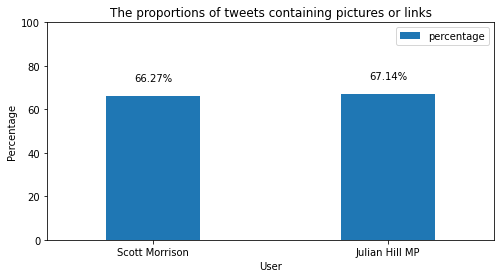

In [28]:
ax = media_prob_true.plot(kind='bar', x='user', y= 'percentage', figsize=(8,4), width=0.4, rot=0)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height.round(2)}%', (x + width/2, y + height*1.1), ha='center')
ax.set_ylim(0, 100)
ax.set_title('The proportions of tweets containing pictures or links')
ax.set_ylabel('Percentage')
ax.set_xlabel('User')

**Task 4** Use pandas to construct a histogram of the number of hashtags in tweets for each of the two users.

In [29]:
hashtag = re.compile("#(\w+)")
df['text_without_hashtags'] = df['text_without_links'].apply(lambda x: hashtag.sub(r'', x))

In [30]:
df['hashtags'] = df['full_text'].apply(lambda x: re.findall(r"#(\w+)", x))
df['hashtags_count'] = df['full_text'].apply(lambda x: re.findall(r"#(\w+)", x)).apply((lambda x: len(x)))
df.head()

,level_0,index,user,full_text,posting_time,hour,text_without_links,tweet_links,include_links,text_without_hashtags,hashtags,hashtags_count
0,0,0,Julian Hill MP,"Ummm….Matty dear, just reminding you, that you...",2021-10-14 05:39:08+00:00,5,"Ummm….Matty dear, just reminding you, that you...",[https://t.co/ntddSa1oCH],True,"Ummm….Matty dear, just reminding you, that you...",[auspol],1
1,1,1,Julian Hill MP,🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦...,2021-10-14 05:37:02+00:00,5,🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦...,"[https://t.co/FC695KjHKy, https://t.co/O1BGYrB...",True,🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦...,[],0
2,3,3,Julian Hill MP,"Last time this happened, Liberal Senator Amand...",2021-10-13 22:13:54+00:00,22,"Last time this happened, Liberal Senator Amand...",[https://t.co/evWooPjhuj],True,"Last time this happened, Liberal Senator Amand...",[],0
3,4,4,Julian Hill MP,This stinks. Lobbyists should not be members o...,2021-10-13 22:13:49+00:00,22,This stinks. Lobbyists should not be members o...,[https://t.co/Bidjp6a1Zd],True,This stinks. Lobbyists should not be members o...,[auspol],1
4,5,5,Julian Hill MP,🌍 This impotent government is talking about go...,2021-10-12 21:42:30+00:00,21,🌍 This impotent government is talking about go...,[],False,🌍 This impotent government is talking about go...,"[auspol, NetZero, ClimateAction]",3


In [31]:
cols = ['user', 'hashtags_count']
ha = df[cols]
ha

,user,hashtags_count
0,Julian Hill MP,1
1,Julian Hill MP,0
2,Julian Hill MP,0
3,Julian Hill MP,1
4,Julian Hill MP,3
...,...,...
301,Scott Morrison,0
302,Scott Morrison,1
303,Scott Morrison,0
304,Scott Morrison,0


In [32]:
cols = ['user', 'hashtags_count']
hashtags1 = df[cols]
hashtags2 = df[cols]
hashtags1 = hashtags1[hashtags1['user'] == 'Julian Hill MP']
hashtags2 = hashtags2[hashtags2['user'] == 'Scott Morrison']
hashtags1.rename(columns={"hashtags_count": "JulianHill"}, inplace =True)
hashtags2.rename(columns={"hashtags_count": "ScottMorrison"}, inplace =True)
hashtags1


,user,JulianHill
0,Julian Hill MP,1
1,Julian Hill MP,0
2,Julian Hill MP,0
3,Julian Hill MP,1
4,Julian Hill MP,3
...,...,...
135,Julian Hill MP,4
136,Julian Hill MP,2
137,Julian Hill MP,2
138,Julian Hill MP,2


In [33]:
hashtags2

,user,ScottMorrison
140,Scott Morrison,0
141,Scott Morrison,0
142,Scott Morrison,0
143,Scott Morrison,0
144,Scott Morrison,0
...,...,...
301,Scott Morrison,0
302,Scott Morrison,1
303,Scott Morrison,0
304,Scott Morrison,0


In [34]:
ht_merged= pd.concat([hashtags1['JulianHill'], hashtags2['ScottMorrison']], axis=1, keys=None)
ht_merged

,JulianHill,ScottMorrison
0,1.0,NaN
1,0.0,NaN
2,0.0,NaN
3,1.0,NaN
4,3.0,NaN
...,...,...
301,NaN,0.0
302,NaN,1.0
303,NaN,0.0
304,NaN,0.0


In [35]:
ht_merged = pd.merge(hashtags1, hashtags2)
#ht_merged['JulianHill'] = ht_merged['JulianHill'].fillna(0).astype(int)
#ht_merged['ScottMorrison'] = ht_merged['ScottMorrison'].fillna(0).astype(int)
#ht_merged.set_index('hashtags_count', inplace=True)
ht_merged

,user,JulianHill,ScottMorrison


In [36]:
hashtags_SM1 = df[cols]
hashtags_SM1 = hashtags_SM1[hashtags_SM1['user'] == 'Scott Morrison']
hashtags_SM1

,user,hashtags_count
140,Scott Morrison,0
141,Scott Morrison,0
142,Scott Morrison,0
143,Scott Morrison,0
144,Scott Morrison,0
...,...,...
301,Scott Morrison,0
302,Scott Morrison,1
303,Scott Morrison,0
304,Scott Morrison,0


In [37]:
hashtags_JL1 = df[cols]
hashtags_JL1 = hashtags_JL1[hashtags_JL1['user'] == 'Julian Hill MP']
hashtags_JL1

,user,hashtags_count
0,Julian Hill MP,1
1,Julian Hill MP,0
2,Julian Hill MP,0
3,Julian Hill MP,1
4,Julian Hill MP,3
...,...,...
135,Julian Hill MP,4
136,Julian Hill MP,2
137,Julian Hill MP,2
138,Julian Hill MP,2


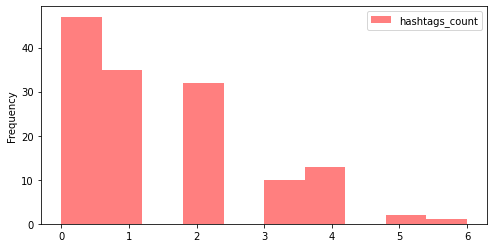

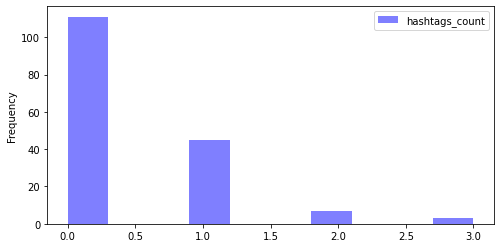

In [38]:
ax1 = hashtags_JL1.plot.hist(alpha=0.5, figsize=(8,4), fontsize=10, color='red')
ax2 = hashtags_SM1.plot.hist(alpha=0.5, figsize=(8,4), fontsize=10, color='blue')

In [39]:
hashtags_JL = df[df['user'] == 'Julian Hill MP'].groupby(['hashtags_count']).size().reset_index(name ='JulianHill')
hashtags_JL

,hashtags_count,JulianHill
0,0,47
1,1,35
2,2,32
3,3,10
4,4,13
5,5,2
6,6,1


In [40]:
hashtags_SM = df[df['user'] == 'Scott Morrison'].groupby(['hashtags_count']).size().reset_index(name ='ScottMorrison')
hashtags_SM

,hashtags_count,ScottMorrison
0,0,111
1,1,45
2,2,7
3,3,3


In [41]:
ht_merged = pd.merge(hashtags_JL, hashtags_SM, how="left", on=['hashtags_count'])
ht_merged['JulianHill'] = ht_merged['JulianHill'].fillna(0).astype(int)
ht_merged['ScottMorrison'] = ht_merged['ScottMorrison'].fillna(0).astype(int)
ht_merged.set_index('hashtags_count', inplace=True)
ht_merged

,JulianHill,ScottMorrison
hashtags_count,,
0,47,111
1,35,45
2,32,7
3,10,3
4,13,0
5,2,0
6,1,0


<AxesSubplot:title={'center':'The number of hashtags in tweets for the two users'}, ylabel='Frequency'>

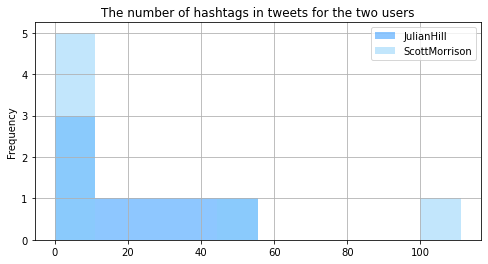

In [42]:
colors_list = ["dodgerblue", "lightskyblue"]
ht_merged.plot.hist(alpha=0.5, title='The number of hashtags in tweets for the two users', grid=True, figsize=(8,4), fontsize=10, 
        color=colors_list)

<AxesSubplot:ylabel='Frequency'>

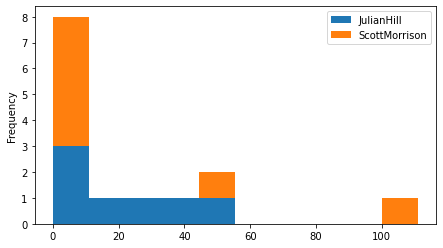

In [43]:
ht_merged[['JulianHill','ScottMorrison']].plot.hist(stacked=True, bins=10, figsize=(7.2,4))

**Task 5** Calculate the log odds ratio (check here for an example) for each word used in the set of tweets, and list the 20 words most strongly associated with each of the two users.

In [44]:
df.head()

,level_0,index,user,full_text,posting_time,hour,text_without_links,tweet_links,include_links,text_without_hashtags,hashtags,hashtags_count
0,0,0,Julian Hill MP,"Ummm….Matty dear, just reminding you, that you...",2021-10-14 05:39:08+00:00,5,"Ummm….Matty dear, just reminding you, that you...",[https://t.co/ntddSa1oCH],True,"Ummm….Matty dear, just reminding you, that you...",[auspol],1
1,1,1,Julian Hill MP,🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦...,2021-10-14 05:37:02+00:00,5,🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦...,"[https://t.co/FC695KjHKy, https://t.co/O1BGYrB...",True,🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦...,[],0
2,3,3,Julian Hill MP,"Last time this happened, Liberal Senator Amand...",2021-10-13 22:13:54+00:00,22,"Last time this happened, Liberal Senator Amand...",[https://t.co/evWooPjhuj],True,"Last time this happened, Liberal Senator Amand...",[],0
3,4,4,Julian Hill MP,This stinks. Lobbyists should not be members o...,2021-10-13 22:13:49+00:00,22,This stinks. Lobbyists should not be members o...,[https://t.co/Bidjp6a1Zd],True,This stinks. Lobbyists should not be members o...,[auspol],1
4,5,5,Julian Hill MP,🌍 This impotent government is talking about go...,2021-10-12 21:42:30+00:00,21,🌍 This impotent government is talking about go...,[],False,🌍 This impotent government is talking about go...,"[auspol, NetZero, ClimateAction]",3


In [45]:
print(df['full_text'][1])
print('*******************************************')
print(df['text_without_links'][1])
print('*******************************************')
print(df['text_without_hashtags'][1])

🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️ https://t.co/FC695KjHKy https://t.co/O1BGYrByth
*******************************************
🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️  
*******************************************
🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️  


In [46]:
cols = ['user', 'text_without_hashtags']
df2=df[cols]
df2

,user,text_without_hashtags
0,Julian Hill MP,"Ummm….Matty dear, just reminding you, that you..."
1,Julian Hill MP,🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦...
2,Julian Hill MP,"Last time this happened, Liberal Senator Amand..."
3,Julian Hill MP,This stinks. Lobbyists should not be members o...
4,Julian Hill MP,🌍 This impotent government is talking about go...
...,...,...
301,Scott Morrison,Thank you once again to the people of Victoria...
302,Scott Morrison,Had a warm discussion with Chancellor Merkel l...
303,Scott Morrison,The coming days will be difficult for many Wes...
304,Scott Morrison,Delighted to meet virtually with Malaysian PM ...


__Cleaning tweets__

Remove emails and metions

In [47]:
df2['mentions'] = df['full_text'].apply(lambda x: re.findall(r'\S*@\S*\s?', x))
df2

,user,text_without_hashtags,mentions
0,Julian Hill MP,"Ummm….Matty dear, just reminding you, that you...",[]
1,Julian Hill MP,🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦...,[]
2,Julian Hill MP,"Last time this happened, Liberal Senator Amand...",[]
3,Julian Hill MP,This stinks. Lobbyists should not be members o...,[]
4,Julian Hill MP,🌍 This impotent government is talking about go...,[]
...,...,...,...
301,Scott Morrison,Thank you once again to the people of Victoria...,[]
302,Scott Morrison,Had a warm discussion with Chancellor Merkel l...,[]
303,Scott Morrison,The coming days will be difficult for many Wes...,[]
304,Scott Morrison,Delighted to meet virtually with Malaysian PM ...,[@MuhyiddinYassin ]


In [48]:
#df2['email'][7]

In [49]:
#df2['mentions'] = df['full_text'].apply(lambda x: re.findall(r"@[^\s]+", x))
#df2

In [50]:
df2['text_without_mentions'] = df2['text_without_hashtags'].apply(lambda x: re.sub('\S*@\S*\s?', '',x))
df2

,user,text_without_hashtags,mentions,text_without_mentions
0,Julian Hill MP,"Ummm….Matty dear, just reminding you, that you...",[],"Ummm….Matty dear, just reminding you, that you..."
1,Julian Hill MP,🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦...,[],🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦...
2,Julian Hill MP,"Last time this happened, Liberal Senator Amand...",[],"Last time this happened, Liberal Senator Amand..."
3,Julian Hill MP,This stinks. Lobbyists should not be members o...,[],This stinks. Lobbyists should not be members o...
4,Julian Hill MP,🌍 This impotent government is talking about go...,[],🌍 This impotent government is talking about go...
...,...,...,...,...
301,Scott Morrison,Thank you once again to the people of Victoria...,[],Thank you once again to the people of Victoria...
302,Scott Morrison,Had a warm discussion with Chancellor Merkel l...,[],Had a warm discussion with Chancellor Merkel l...
303,Scott Morrison,The coming days will be difficult for many Wes...,[],The coming days will be difficult for many Wes...
304,Scott Morrison,Delighted to meet virtually with Malaysian PM ...,[@MuhyiddinYassin ],Delighted to meet virtually with Malaysian PM ...


In [51]:
#df2['text_without_mentions'][6]

In [52]:
#print(df['full_text'][6])
#print('*******************************************')
#print(df['text_without_links'][6])
#print('*******************************************')
#print(df['text_without_hashtags'][6])

In [53]:
#df2['mentions-'] = df2['text_without_hashtags'].apply(lambda x: re.findall(r"@[^\s]+", x))
#df2['mentions_count'] = df2['text_without_hashtags'].apply(lambda x: re.findall(r"@[^\s]+", x)).apply((lambda x: len(x)))
#df2

In [54]:
#df2[df2['mentions_count'] > 1].head()

In [55]:
#https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags=re.UNICODE)
df2['text_without_emoji'] = df2['text_without_mentions'].apply(lambda x: emoji_pattern.sub(r'', x))

In [56]:
df2['text_without_emoji']

0      Ummm….Matty dear, just reminding you, that you...
1                                                       
2      Last time this happened, Liberal Senator Amand...
3      This stinks. Lobbyists should not be members o...
4       This impotent government is talking about goi...
                             ...                        
301    Thank you once again to the people of Victoria...
302    Had a warm discussion with Chancellor Merkel l...
303    The coming days will be difficult for many Wes...
304    Delighted to meet virtually with Malaysian PM ...
305     are closer than we have ever been. While we c...
Name: text_without_emoji, Length: 306, dtype: object

In [57]:
#print(df['full_text'][16])
#print('*******************************************')
#print(df2['text_without_mentions'][16])
#print('*******************************************')
#print(df2['text_without_mentions'][16])
#print('*******************************************')
#print(df2['text_without_emoji'][16])

In [58]:
df2['text_without_emoji'][5]

'So many Australians were only in Afghanistan, as they’d been waiting for years, with their husbands and wives, for this miserable government to process their partner visas.\n\nNo words are truly adequate to condemn Morrison’s nasty government for this.\n '

__Convert all words to lowercase__

In [59]:
df2['cleaned_tweets'] = df2['text_without_emoji'].apply(lambda x: re.sub(r'\w', lambda m: m.group(0).lower(),x))
df2['cleaned_tweets']

0      ummm….matty dear, just reminding you, that you...
1                                                       
2      last time this happened, liberal senator amand...
3      this stinks. lobbyists should not be members o...
4       this impotent government is talking about goi...
                             ...                        
301    thank you once again to the people of victoria...
302    had a warm discussion with chancellor merkel l...
303    the coming days will be difficult for many wes...
304    delighted to meet virtually with malaysian pm ...
305     are closer than we have ever been. while we c...
Name: cleaned_tweets, Length: 306, dtype: object

In [60]:
import string
word_list= df2['cleaned_tweets'].apply(lambda x: re.sub('['+string.punctuation+']', '', x).split(), x)
word_list

0      [ummm…matty, dear, just, reminding, you, that,...
1                                                     []
2      [last, time, this, happened, liberal, senator,...
3      [this, stinks, lobbyists, should, not, be, mem...
4      [this, impotent, government, is, talking, abou...
                             ...                        
301    [thank, you, once, again, to, the, people, of,...
302    [had, a, warm, discussion, with, chancellor, m...
303    [the, coming, days, will, be, difficult, for, ...
304    [delighted, to, meet, virtually, with, malaysi...
305    [are, closer, than, we, have, ever, been, whil...
Name: cleaned_tweets, Length: 306, dtype: object

In [61]:
for word in word_list:
    print(word)

['ummm…matty', 'dear', 'just', 'reminding', 'you', 'that', 'you’re', 'the', 'government', 'you’ve', 'been', 'the', 'government', 'for', '8', 'years', 'act', 'like', 'it', 'this', 'is', 'a', 'question', 'for', 'you']
[]
['last', 'time', 'this', 'happened', 'liberal', 'senator', 'amanda', 'stoker', 'agreed', 'it', 'wasn’t', 'a', 'good', 'look', 'and', 'the', 'member', 'resigned', 'from', 'the', 'aat', 'will', 'she', 'speak', 'up', 'today', 'will', 'this', 'bloke', 'quit', 'now']
['this', 'stinks', 'lobbyists', 'should', 'not', 'be', 'members', 'of', 'the', 'aat', 'morrison', 'is', 'stacking', 'out', 'the', 'aat', 'using', 'it', 'as', 'a', 'lucrative', 'jobs', 'scheme', 'for', 'liberal', 'party', 'hacks', 'amp', 'failed', 'mps']
['this', 'impotent', 'government', 'is', 'talking', 'about', 'going', 'to', 'the', 'moon', 'amp', 'collecting', 'lunar', 'soil', 'for', 'a', 'science', 'yet', 'for', '8', 'years', 'they’ve', 'failed', 'to', 'act', 'on', 'climate', 'change', 'for', 'this', 'planet'

In [62]:
word_list[4]

['this',
 'impotent',
 'government',
 'is',
 'talking',
 'about',
 'going',
 'to',
 'the',
 'moon',
 'amp',
 'collecting',
 'lunar',
 'soil',
 'for',
 'a',
 'science',
 'yet',
 'for',
 '8',
 'years',
 'they’ve',
 'failed',
 'to',
 'act',
 'on',
 'climate',
 'change',
 'for',
 'this',
 'planet',
 'still',
 'not',
 'even',
 'a',
 'target',
 'for',
 '2050']

In [63]:
texts = []
for each_tweet in word_l:
    text = each_tweet
    print(text)
    lowercase = text.lower()
    print(lowercase)
    texts.append(lowercase)
tweet_words = []
for text in texts:
    words = re.findall('[^\W\d_]+', text)
    words = [w for w in words if len(w) > 1]
    tweet_words.append(words)
return tweet_words

NameError: name 'word_l' is not defined

In [ ]:
df.dtypes

**Task 6** Use the vaderSentiment module to calculate the sentiment of each tweet, and then for each of the two users, calculate the average 'compound' sentiment for all their tweets.

In [73]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#note: depending on how you installed (e.g., using source code download versus pip install), you may need to import like this:
#from vaderSentiment import SentimentIntensityAnalyzer

# --- examples -------
sentences = ["VADER is smart, handsome, and funny.",  # positive sentence example
             "VADER is smart, handsome, and funny!",  # punctuation emphasis handled correctly (sentiment intensity adjusted)
             "VADER is very smart, handsome, and funny.", # booster words handled correctly (sentiment intensity adjusted)
             "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
             "VADER is VERY SMART, handsome, and FUNNY!!!", # combination of signals - VADER appropriately adjusts intensity
             "VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!", # booster words & punctuation make this close to ceiling for score
             "VADER is not smart, handsome, nor funny.",  # negation sentence example
             "The book was good.",  # positive sentence
             "At least it isn't a horrible book.",  # negated negative sentence with contraction
             "The book was only kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
             "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
             "Today SUX!",  # negative slang with capitalization emphasis
             "Today only kinda sux! But I'll get by, lol", # mixed sentiment example with slang and constrastive conjunction "but"
             "Make sure you :) or :D today!",  # emoticons handled
             "Catch utf-8 emoji such as such as 💘 and 💋 and 😁",  # emojis handled
             "Not bad at all"  # Capitalized negation
            ]

analyzer = SentimentIntensityAnalyzer()
for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))

VADER is smart, handsome, and funny.----------------------------- {'neg': 0.0, 'neu': 0.254, 'pos': 0.746, 'compound': 0.8316}
VADER is smart, handsome, and funny!----------------------------- {'neg': 0.0, 'neu': 0.248, 'pos': 0.752, 'compound': 0.8439}
VADER is very smart, handsome, and funny.------------------------ {'neg': 0.0, 'neu': 0.299, 'pos': 0.701, 'compound': 0.8545}
VADER is VERY SMART, handsome, and FUNNY.------------------------ {'neg': 0.0, 'neu': 0.246, 'pos': 0.754, 'compound': 0.9227}
VADER is VERY SMART, handsome, and FUNNY!!!---------------------- {'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'compound': 0.9342}
VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!--------- {'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'compound': 0.9469}
VADER is not smart, handsome, nor funny.------------------------- {'neg': 0.646, 'neu': 0.354, 'pos': 0.0, 'compound': -0.7424}
The book was good.----------------------------------------------- {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'co

In [ ]:
#vadertext

In [74]:
cols = ['user','text_without_mentions']
df3 = df2[cols]
df3 = df3.rename(columns={'text_without_mentions': 'vadertext'})
df3

,user,vadertext
0,Julian Hill MP,"Ummm….Matty dear, just reminding you, that you..."
1,Julian Hill MP,🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦...
2,Julian Hill MP,"Last time this happened, Liberal Senator Amand..."
3,Julian Hill MP,This stinks. Lobbyists should not be members o...
4,Julian Hill MP,🌍 This impotent government is talking about go...
...,...,...
301,Scott Morrison,Thank you once again to the people of Victoria...
302,Scott Morrison,Had a warm discussion with Chancellor Merkel l...
303,Scott Morrison,The coming days will be difficult for many Wes...
304,Scott Morrison,Delighted to meet virtually with Malaysian PM ...


In [75]:
valence_score = []
compound = []
analyzer = SentimentIntensityAnalyzer()
for sentence in df3['vadertext']:
    vs = analyzer.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs))) 
    print("{:-<65} {}".format(sentence, str(vs['compound']))) 
    valence_score.append(vs)
    compound.append(vs['compound'])
df3['valence_score'] = valence_score
df3['compound'] = compound

Ummm….Matty dear, just reminding you, that you’re the Government. 

You’ve been the Government for 8 years. Act like it.

This is a question for you.
  {'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'compound': 0.6249}
Ummm….Matty dear, just reminding you, that you’re the Government. 

You’ve been the Government for 8 years. Act like it.

This is a question for you.
  0.6249
🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️  --- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️  --- 0.0
Last time this happened, Liberal Senator Amanda Stoker agreed it wasn’t a good look, and the Member resigned from the AAT.

Will she speak up today? Will this bloke quit now?  {'neg': 0.057, 'neu': 0.792, 'pos': 0.152, 'compound': 0.5204}
Last time this happened, Liberal Senator Amanda Stoker agreed it wasn’t a good look, and the Member resigned from the AAT.

Will she speak up today? Will this bloke quit now?  0.5204
This stinks. Lob

In [76]:
df3

,user,vadertext,valence_score,compound
0,Julian Hill MP,"Ummm….Matty dear, just reminding you, that you...","{'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'comp...",0.6249
1,Julian Hill MP,🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,Julian Hill MP,"Last time this happened, Liberal Senator Amand...","{'neg': 0.057, 'neu': 0.792, 'pos': 0.152, 'co...",0.5204
3,Julian Hill MP,This stinks. Lobbyists should not be members o...,"{'neg': 0.151, 'neu': 0.771, 'pos': 0.077, 'co...",-0.3818
4,Julian Hill MP,🌍 This impotent government is talking about go...,"{'neg': 0.119, 'neu': 0.881, 'pos': 0.0, 'comp...",-0.6883
...,...,...,...,...
301,Scott Morrison,Thank you once again to the people of Victoria...,"{'neg': 0.038, 'neu': 0.803, 'pos': 0.159, 'co...",0.6908
302,Scott Morrison,Had a warm discussion with Chancellor Merkel l...,"{'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'comp...",0.7506
303,Scott Morrison,The coming days will be difficult for many Wes...,"{'neg': 0.166, 'neu': 0.674, 'pos': 0.16, 'com...",-0.0868
304,Scott Morrison,Delighted to meet virtually with Malaysian PM ...,"{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp...",0.8885


In [78]:
#the average 'compound' sentiment for all their tweets
df3.groupby('user')['compound'].mean()

user
Julian Hill MP   -0.025941
Scott Morrison    0.522366
Name: compound, dtype: float64